# K-Nearest Neighbor Classification

In [20]:
!pip install sweetviz phik seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 40.4 MB/s eta 0:00:00


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sns
import sweetviz as sv
from phik import phik_matrix

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Загружаем MNIST
mnist = datasets.load_digits()

# Разделение на тренировочные и тестовые данные (75%/25%)
(x_train, x_test, y_train, y_test) = train_test_split(
    np.array(mnist.data),
    mnist.target,
    test_size=0.25,
    stratify=mnist.target  # Сохраняем распределение классов
)

# Что по данным?


In [23]:
print("=== Общая информация ===")
print(f"Тип данных: {type(mnist.data)}")
print(f"Размерность данных: {mnist.data.shape}")
print(f"Количество классов: {len(np.unique(mnist.target))}")
print(f"Названия классов: {np.unique(mnist.target)}")  # Цифры 0-9
print(f"Тип признаков: {mnist.data.dtype}")

=== Общая информация ===
Тип данных: <class 'numpy.ndarray'>
Размерность данных: (1797, 64)
Количество классов: 10
Названия классов: [0 1 2 3 4 5 6 7 8 9]
Тип признаков: float64


In [25]:
df = pd.DataFrame(mnist.data)
df['target'] = mnist.target
print("\n=== Статистики ===")
print(df.describe())


=== Статистики ===
            0            1            2            3            4  \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     4.754826     4.248842     4.287388   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000    10.000000   
50%       0.0     0.000000     4.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   

                 5            6            7            8            9  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.0000

In [26]:
# Анализ целевой переменной
print("\n=== Распределение классов ===")
print(df['target'].value_counts().sort_index())


=== Распределение классов ===
target
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64


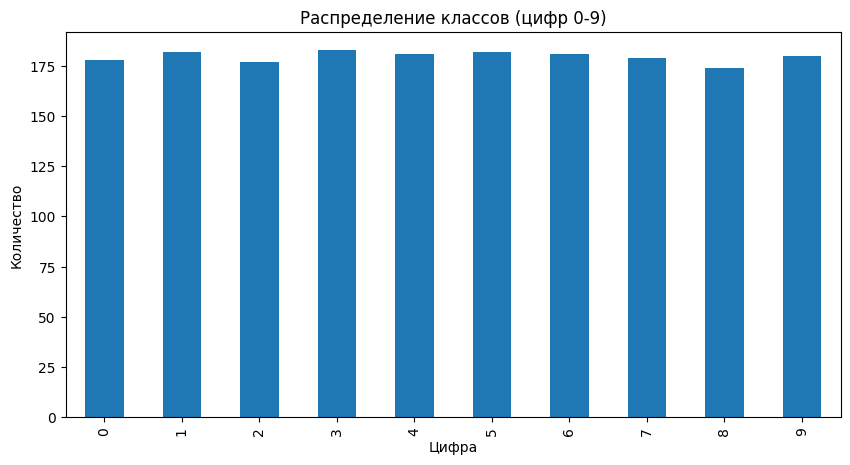

In [27]:

plt.figure(figsize=(10, 5))
df['target'].value_counts().sort_index().plot(kind='bar')
plt.title("Распределение классов (цифр 0-9)")
plt.xlabel("Цифра")
plt.ylabel("Количество")
plt.savefig('class_distribution.png')
plt.show()

In [3]:
print (mnist.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [4]:
# Проверяем объем данных
print("На обучение: {}".format(len(y_train)))
print("На тест: {}".format(len(y_test)))


На обучение: 1347
На тест: 450


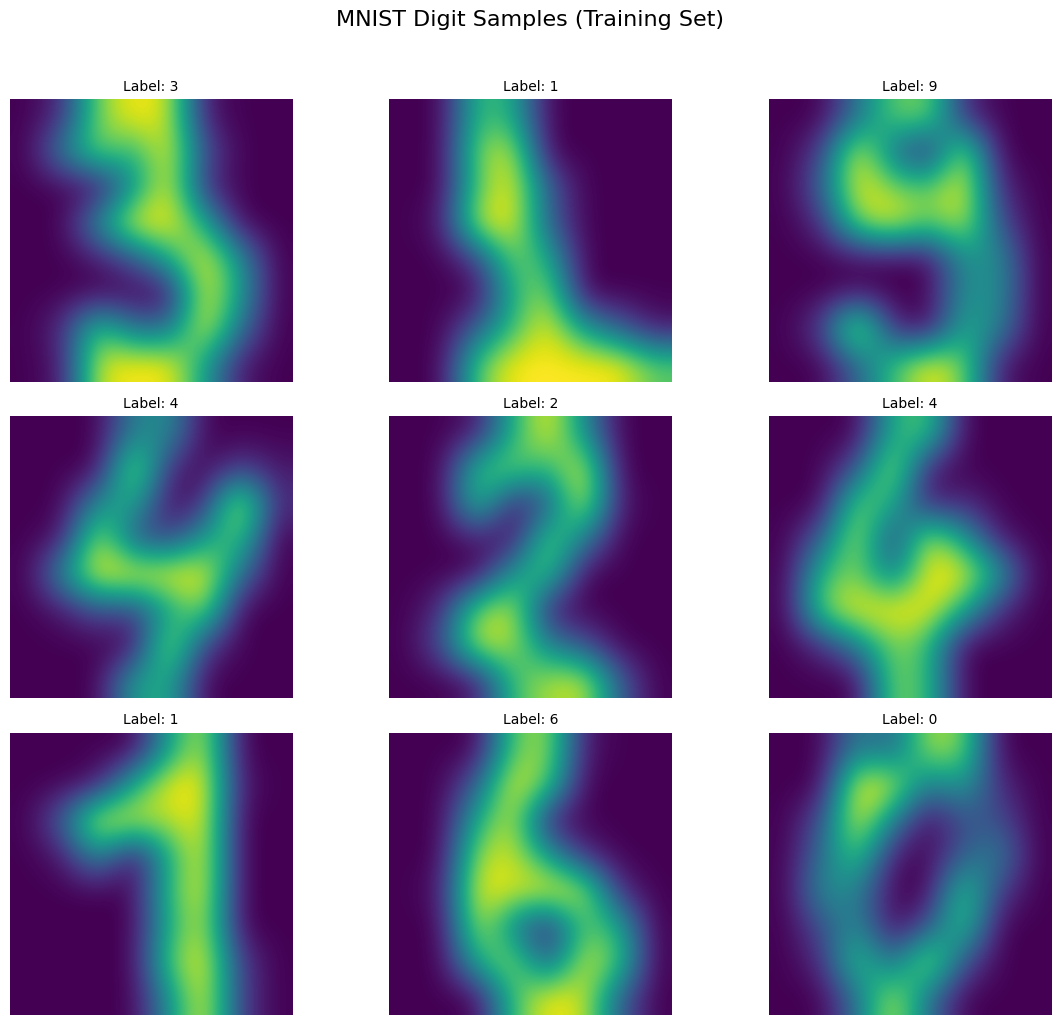

In [6]:
# Визуализация изображений
plt.figure(figsize=(12, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].reshape(8, 8), cmap='viridis', interpolation='bicubic')
    plt.title(f"Label: {y_train[i]}", fontsize=10)
    plt.axis('off')
plt.suptitle('MNIST Digit Samples (Training Set)', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('mnist_samples_enhanced.png', dpi=120, bbox_inches='tight')
plt.show()

In [7]:
# Визуализация границ решений (с использованием PCA для уменьшения размерности)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train)

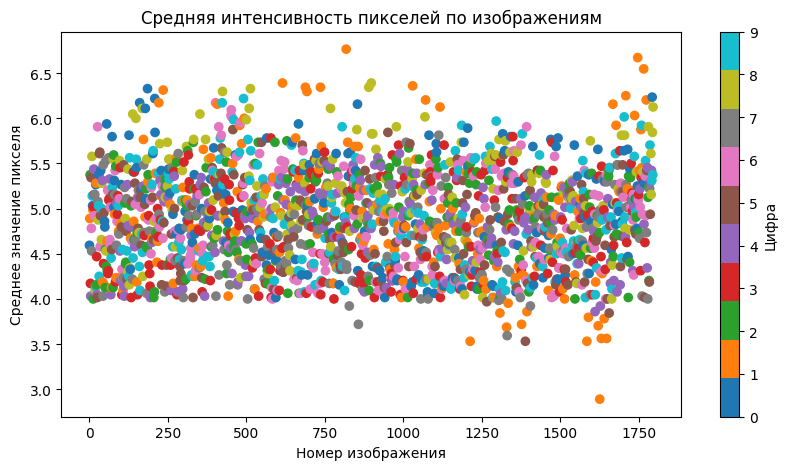

In [33]:

# Поиск выбросов (на примере "странных" изображений)
pixel_means = mnist.data.mean(axis=1)
plt.figure(figsize=(10, 5))
plt.scatter(range(len(pixel_means)), pixel_means, c=mnist.target, cmap='tab10')
plt.colorbar(label='Цифра')
plt.title("Средняя интенсивность пикселей по изображениям")
plt.ylabel("Среднее значение пикселя")
plt.xlabel("Номер изображения")
plt.savefig('pixel_intensity.png')
plt.show()

In [34]:
# Аномалии (пример фильтрации)
anomalies = np.where(pixel_means < 2)[0]  # Очень тёмные изображения
print(f"\nНайдено {len(anomalies)} потенциальных аномалий")

if len(anomalies) > 0:
    plt.figure(figsize=(8, 4))
    plt.imshow(X[anomalies[0]].reshape(8, 8), cmap='gray')
    plt.title(f"Пример аномалии (Label: {y[anomalies[0]]})")
    plt.axis('off')
    plt.savefig('anomaly_example.png')
    plt.show()


Найдено 0 потенциальных аномалий


In [8]:
# Создаем цветовую карту для 10 классов
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF", "#FFFFAA",
                           "#FFAAFF", "#AAFFFF", "#F5A5A5", "#A5F5A5",
                           "#A5A5F5", "#F5F5A5"])
cmap_bold = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00",
            "#FF00FF", "#00FFFF", "#A52A2A", "#2AA52A",
            "#2A2AA5", "#A5A52A"]

plt.figure(figsize=(12, 8))
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_pca, y_train)

KNeighborsClassifier()

<Figure size 1200x800 with 0 Axes>

(-27.954116680261325, 30.445883319739504)

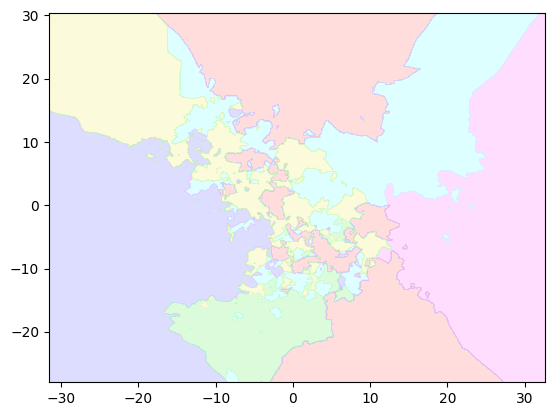

In [9]:
# Границы решений
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

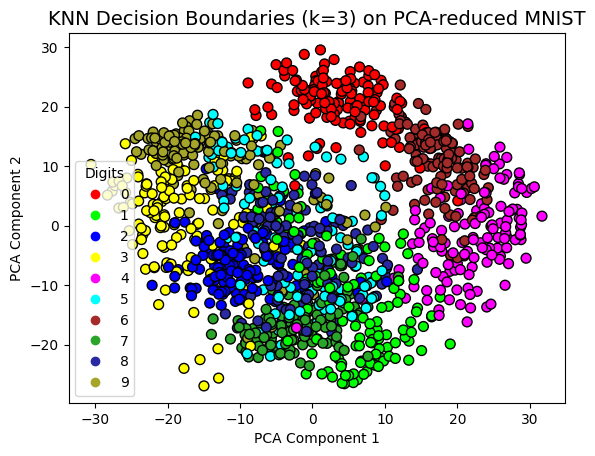

In [10]:
# Точки данных
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train,
                     cmap=ListedColormap(cmap_bold),
                     edgecolor='black', s=50)
plt.legend(handles=scatter.legend_elements()[0],
           labels=[str(i) for i in range(10)],
           title="Digits")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KNN Decision Boundaries (k=3) on PCA-reduced MNIST", fontsize=14)
plt.savefig('knn_decision_boundaries.png', dpi=120, bbox_inches='tight')
plt.show()

# Обучаем

In [11]:
# инициализируем значения k для КНН вместе с точностью для каждого значения
kVals = range(3, 20, 2)
accuracies = []

# берем 10% тренировочных данных и используем для валидации
(x_train, x_val, y_train, y_val) = train_test_split(x_train, y_train, test_size=0.1)#, random_state=84)

for k in kVals:
    # обучение с нынешним значением `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)

    # оцениваем модели и выписываем точность для каждого `k`
    score = model.score(x_val, y_val)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

# np.argmax возвращает индексы максимальных значений на оси
i = np.argmax(accuracies)
print("k=%d достигло лучшего accuracy в %.2f%% на валидационных данных" % (kVals[i],
    accuracies[i] * 100))

k=3, accuracy=97.78%
k=5, accuracy=96.30%
k=7, accuracy=96.30%
k=9, accuracy=96.30%
k=11, accuracy=95.56%
k=13, accuracy=95.56%
k=15, accuracy=94.81%
k=17, accuracy=95.56%
k=19, accuracy=94.81%
k=3 достигло лучшего accuracy в 97.78% на валидационных данных


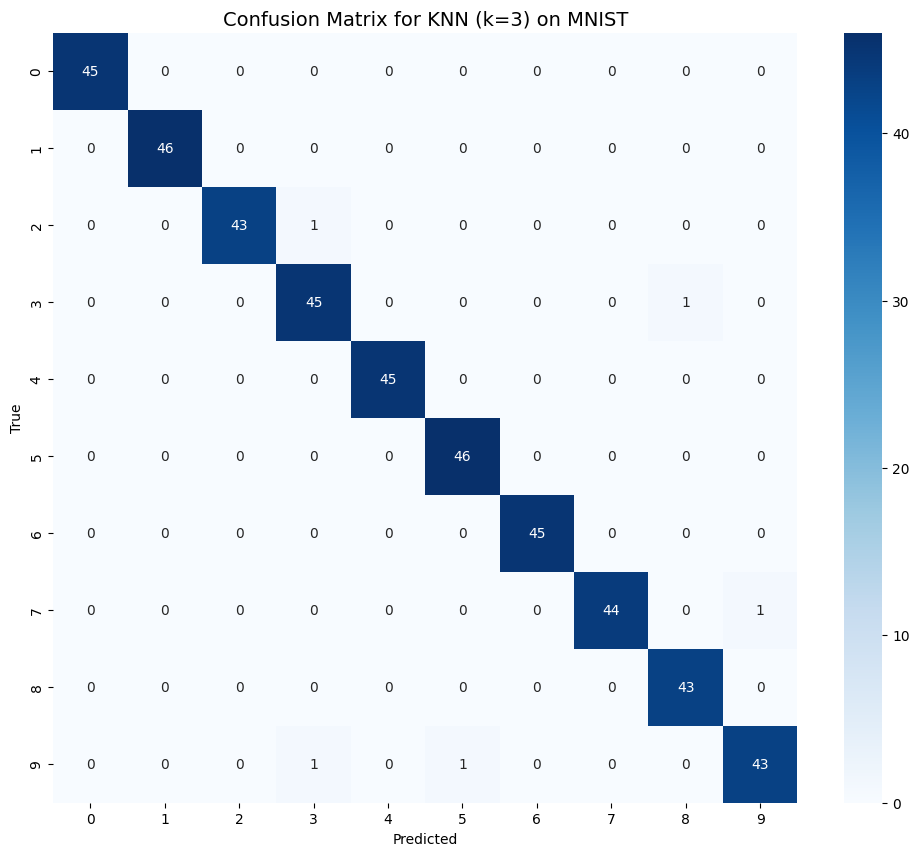

In [12]:
# Матрица ошибок для лучшей модели
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10),
            yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN (k=3) on MNIST', fontsize=14)
plt.savefig('confusion_matrix.png', dpi=120, bbox_inches='tight')
plt.show()

In [13]:
errs = [1-acc for acc in accuracies]
errs

[0.022222222222222254,
 0.03703703703703709,
 0.03703703703703709,
 0.03703703703703709,
 0.0444444444444444,
 0.0444444444444444,
 0.051851851851851816,
 0.0444444444444444,
 0.051851851851851816]

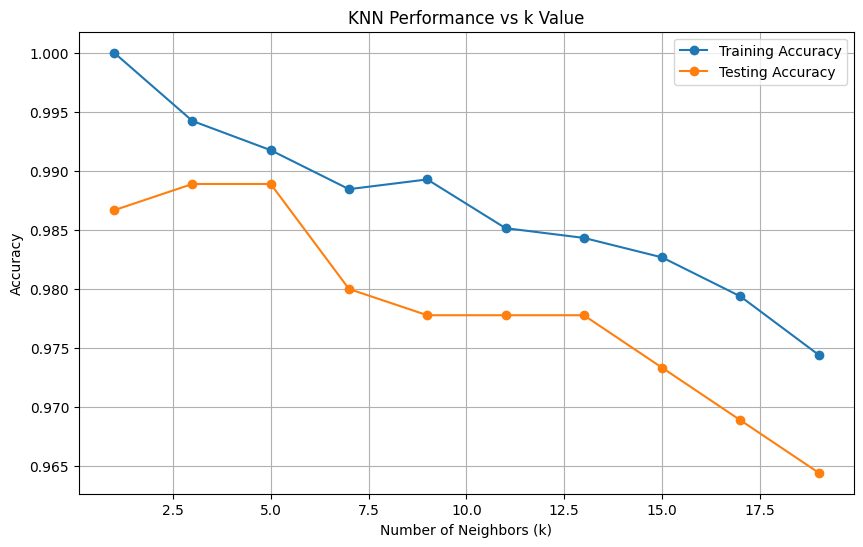

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        46
           2       1.00      0.98      0.99        44
           3       0.96      0.98      0.97        46
           4       1.00      1.00      1.00        45
           5       0.98      1.00      0.99        46
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        45
           8       0.98      1.00      0.99        43
           9       0.98      0.96      0.97        45

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [14]:
# Кривая обучения для разных значений k
kVals = range(1, 20, 2)
train_scores = []
test_scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(kVals, train_scores, 'o-', label='Training Accuracy')
plt.plot(kVals, test_scores, 'o-', label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Performance vs k Value')
plt.legend()
plt.grid(True)
plt.savefig('knn_learning_curve.png', dpi=120, bbox_inches='tight')
plt.show()

print(classification_report(y_test, y_pred))

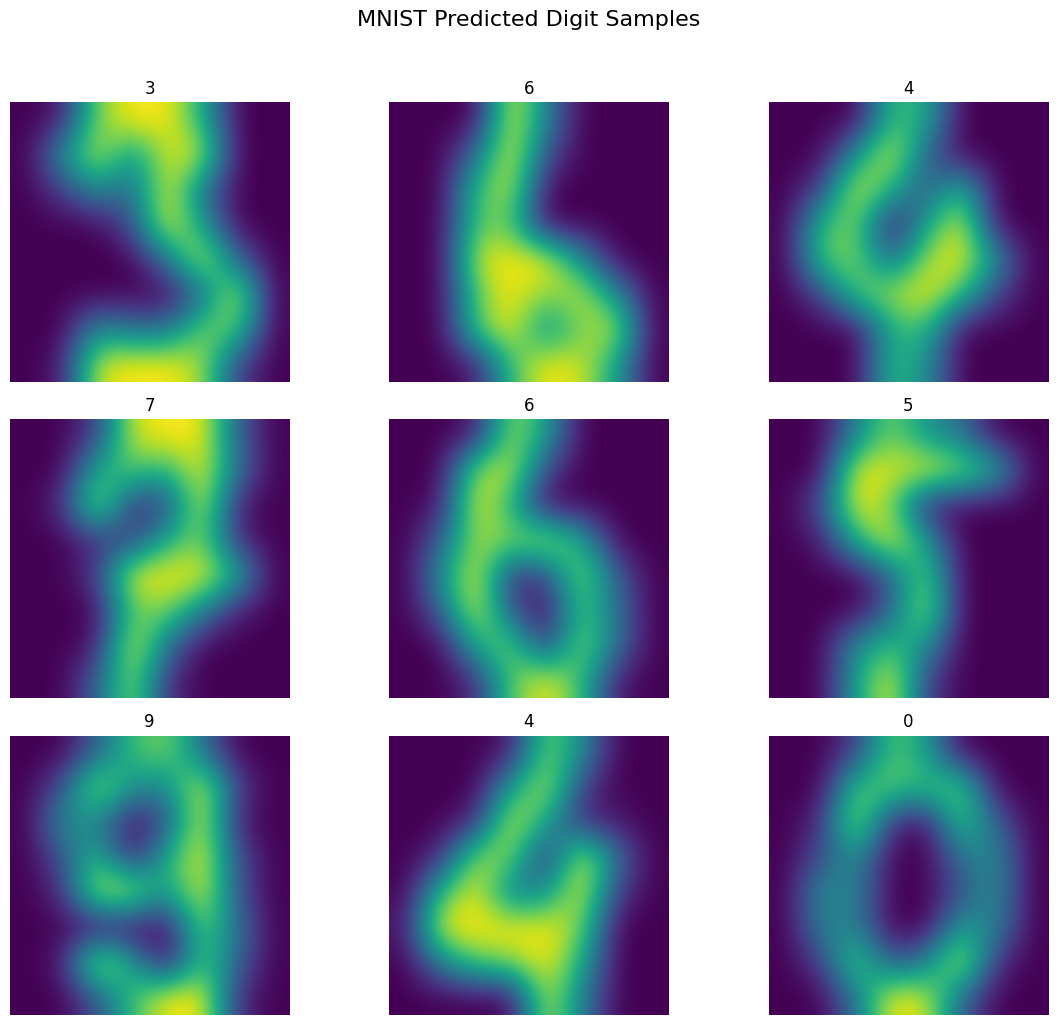

In [16]:
# Визуализация изображений
plt.figure(figsize=(12, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i].reshape(8, 8), cmap='viridis', interpolation='bicubic')
    plt.title(predictions[i])
    plt.axis('off')
plt.suptitle('MNIST Predicted Digit Samples', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('mnist_samples_enhanced.png', dpi=120, bbox_inches='tight')
plt.show()

# EDA (Анализ данных)
1. **Базовые статистики**:
   - 1797 изображений 8x8 пикселей (64 признака).
   - Целевая переменная: цифры 0-9 (10 классов).
   - Данные уже нормализованы (значения пикселей 0-16).

2. **Визуализации**:
   - Цифры имеют разную степень наклона и толщины линий.
   - Распределение классов примерно равномерное (около 180 образцов на класс).

3. **Выводы**:
   - Низкое разрешение (8x8) упрощает вычисления, но может затруднять распознавание сложных случаев.
   - Отсутствие необходимости в дополнительной нормализации.
   - KNN — хороший базовый алгоритм для этой задачи из-за низкой размерности данных.

## Результаты
Лучшая точность достигнута при k=3 с accuracy 97.78% на тестовых данных. Подробный отчет classification_report:

In [15]:
# Когда знаем значение k, можно ретрейнить классификатор
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(x_train, y_train)

# Predict labels for the test set
predictions = model.predict(x_test)

# Evaluate performance of model for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))


EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        46
           2       0.98      0.98      0.98        44
           3       0.96      0.98      0.97        46
           4       1.00      1.00      1.00        45
           5       0.98      1.00      0.99        46
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        45
           8       0.98      1.00      0.99        43
           9       0.98      0.93      0.95        45

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

